In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import utils as utl
import data as d
import models as m
tfd = tfp.distributions
tfm = tf.math

%load_ext autoreload
%autoreload 2

# Prepare Toy Data

In [2]:
# Number of datapoints to generate
N = 10000
data_names = d.get_toy_names()
print('Available Options:')
print(data_names)

Available Options:
['8gaussians', 'swissroll', 'circles', 'rings', 'moons', 'pinwheel', '2spirals', 'checkerboard', 'line', 'cos']


In [3]:
# Generate Data
name = 'checkerboard'
data = d.get_ffjord_data(name,batch_size=N)

# split into train, val, test
train, val, test = d.split_data(data)

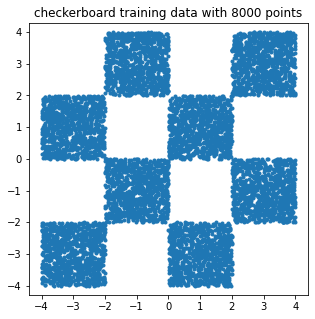

In [4]:
# Inspect the data
f,ax = plt.subplots(figsize=(5,5))
ax.plot(train[:, 0], train[:, 1], '.')
ax.axis('equal')
ax.set_title(name + f' training data with {len(train)} points')
plt.show()

In [5]:
# Convert the data to a TF dataset
batch_size = 100
train_ds = d.to_tf_dataset(train, batch_size=batch_size)

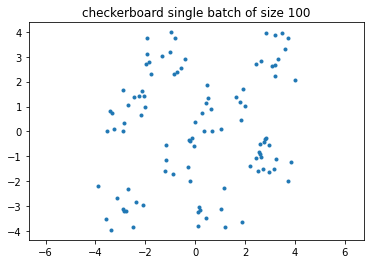

In [6]:
# Plot a single batch of this dataset
single_batch = list(train_ds)[0]
f,ax = plt.subplots()
ax.plot(single_batch[:, 0], single_batch[:, 1], '.')
ax.axis('equal')
ax.set_title(name + f' single batch of size {batch_size}')
plt.show()

# Initialize Model

In [7]:
K = 8 # Number of clusters
M = 2 # Number of dimensions

In [8]:
# init model
from models import CPGaussian
model = m.CPGaussian(K, M)

# use Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Fit model to the data

In [9]:
# Number of epochs to run the loop
EPOCHS = 100

In [ ]:
# Fit the model
losses = model.fit(train_ds, EPOCHS, optimizer, 'kmeans')

### Plot results

In [ ]:
# plot loss
f,ax = plt.subplots()
ax.plot(range(len(losses)), np.array(losses))
ax.set_title('Training loss')
ax.set_xlabel('iteration')
plt.show()

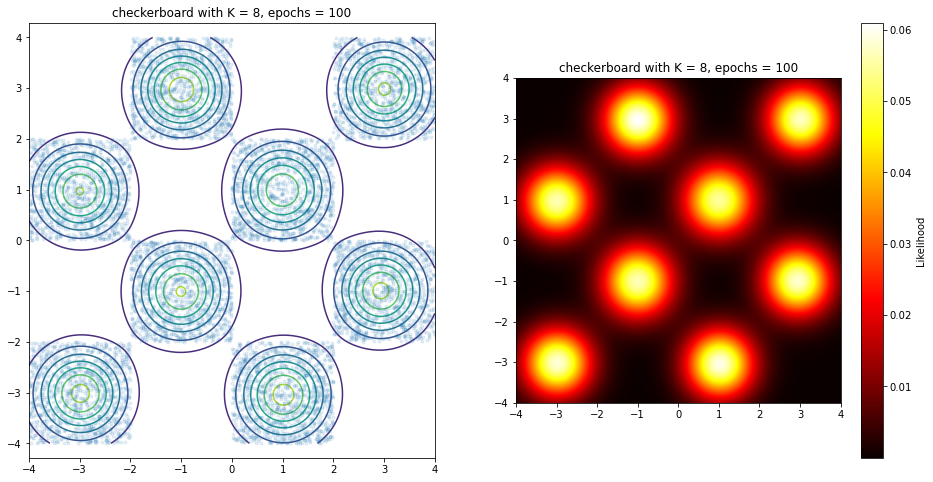

Density integrates to 1.0
It should be = 1.0


In [11]:
f,ax = plt.subplots(1,2,figsize=(16,8))
utl.plot_contours(ax[0], train, model,alpha=0.1)
ax[0].set_title(name + ' with K = ' + str(K) + ', epochs = ' + str(EPOCHS))

utl.plot_density(ax[1], model,cmap='hot')
ax[1].set_title(name + ' with K = ' + str(K)+', epochs = ' + str(EPOCHS))
plt.show()


integrand = utl.unitTest(model,limits=[-6,6])
print(f'Density integrates to {round(integrand,4)}')
print('It should be = 1.0')